In [2]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [7]:
trainset='../input/money-dataset/MONEY-20220518T154210Z-001/MONEY'

In [8]:
data_generator = ImageDataGenerator(rescale=1./255,validation_split=0.1,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [9]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=64,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=64,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 528 images belonging to 11 classes.
Found 53 images belonging to 11 classes.


In [11]:
validation_set.class_indices

{'100k': 0,
 '10k': 1,
 '1k': 2,
 '200d': 3,
 '200k': 4,
 '20k': 5,
 '2k': 6,
 '500d': 7,
 '500k': 8,
 '50k': 9,
 '5k': 10}

In [12]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))

2022-05-20 06:13:31.456549: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [13]:

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.fit(train_dataset,batch_size=64,epochs=20,verbose=1,validation_data=validation_set)

2022-05-20 06:13:53.901281: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
9/9 [==============================] - 156s 17s/step - loss: 3.4964 - accuracy: 0.1042 - val_loss: 2.3816 - val_accuracy: 0.1698
Epoch 2/20
9/9 [==============================] - 126s 14s/step - loss: 2.3579 - accuracy: 0.1705 - val_loss: 2.3663 - val_accuracy: 0.2264
Epoch 3/20
9/9 [==============================] - 111s 12s/step - loss: 2.2954 - accuracy: 0.2178 - val_loss: 2.2872 - val_accuracy: 0.3208
Epoch 4/20
9/9 [==============================] - 116s 13s/step - loss: 2.1776 - accuracy: 0.2822 - val_loss: 2.1282 - val_accuracy: 0.4340
Epoch 5/20
9/9 [==============================] - 115s 13s/step - loss: 1.9539 - accuracy: 0.3258 - val_loss: 1.8293 - val_accuracy: 0.5094
Epoch 6/20
9/9 [==============================] - 113s 13s/step - loss: 1.7578 - accuracy: 0.3845 - val_loss: 1.6305 - val_accuracy: 0.5283
Epoch 7/20
9/9 [==============================] - 116s 13s/step - loss: 1.6644 - accuracy: 0.4167 - val_loss: 1.4230 - val_accuracy: 0.4717
Epoch 8/20
9/9 [====

In [15]:
score=model.evaluate(validation_set,verbose=1)
print("test accuracy = ",score[1])

1/1 [==============================] - 10s 10s/step - loss: 0.4235 - accuracy: 0.7925
test accuracy =  0.7924528121948242


In [17]:
model.save('./money_final.h5')

In [ ]:
tf.keras.models.load_model('./money.h5')

In [18]:
test_url= '../input/testttttttttt'
test=ImageDataGenerator(rescale=1./255,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [19]:
test_data=test.flow_from_directory(
    test_url,
    target_size=(100,100),
    class_mode='categorical',
    shuffle=False, 
   )

Found 23 images belonging to 1 classes.


In [20]:
classes = ['100k','10k','1k','200đ','200k','20k','2k','500đ','500k','5k']


200k


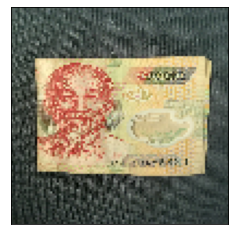

In [21]:
url='../input/testttttttttt/Test/z3425852850726_011235988d3c892374559d97ddedb8d2.jpg'
img=load_img(url,target_size=(100,100))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,100,100,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])

5k


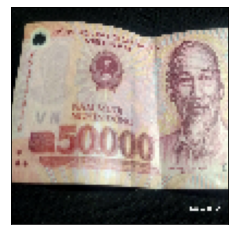

In [22]:
url='../input/money-dataset/MONEY-20220518T154210Z-001/MONEY/50k/IMG20220518192938.jpg'
img=load_img(url,target_size=(100,100))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,100,100,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])

1k


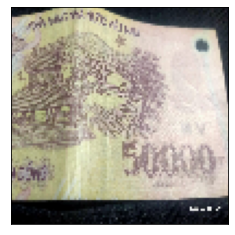

In [23]:
url='../input/money-dataset/MONEY-20220518T154210Z-001/MONEY/50k/IMG20220518192951.jpg'
img=load_img(url,target_size=(100,100))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,100,100,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])

20k


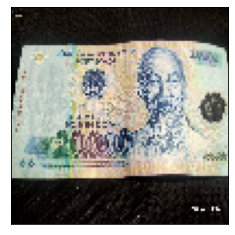

In [24]:
url='../input/money-dataset/MONEY-20220518T154210Z-001/MONEY/20k/IMG20220518195034.jpg'
img=load_img(url,target_size=(100,100))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,100,100,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])

10k


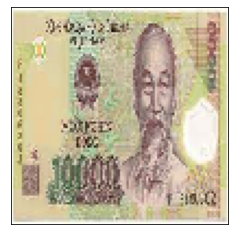

In [25]:
url='../input/testttttttttt/Test/download (5).jpg'
img=load_img(url,target_size=(100,100))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,100,100,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])

20k


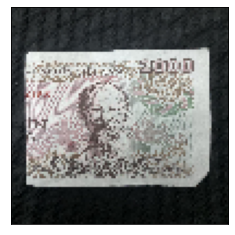

In [26]:
url='../input/testttttttttt/Test/z3424977262511_ca553b6b9ba873fa7f1ce88ee8ef7ad0.jpg'
img=load_img(url,target_size=(100,100))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,100,100,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])